In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the Boston dataset (replace with your file path if needed)
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv')

# Preview it
df.head()


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("Price ($1000s)")
plt.ylabel("Frequency")
plt.show()


KeyError: 'MEDV'

In [7]:
print(df.columns)


Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')


In [8]:
import pandas as pd

# Load with whitespace separator (not comma)
df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, header=None)

# Add proper column names manually (standard Boston dataset)
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Preview the fixed DataFrame
df.head()


/tmp/ipykernel_35/2299509276.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


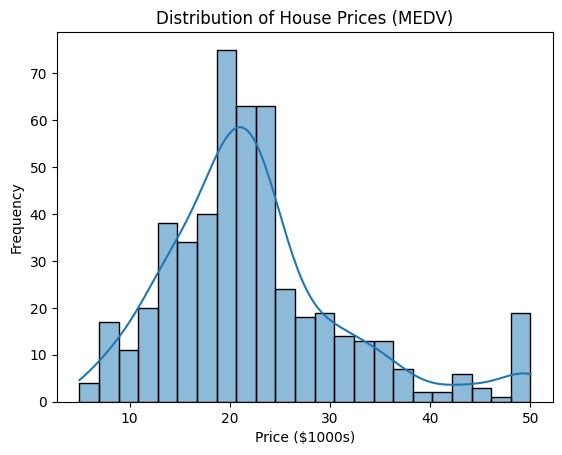

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("Price ($1000s)")
plt.ylabel("Frequency")
plt.show()



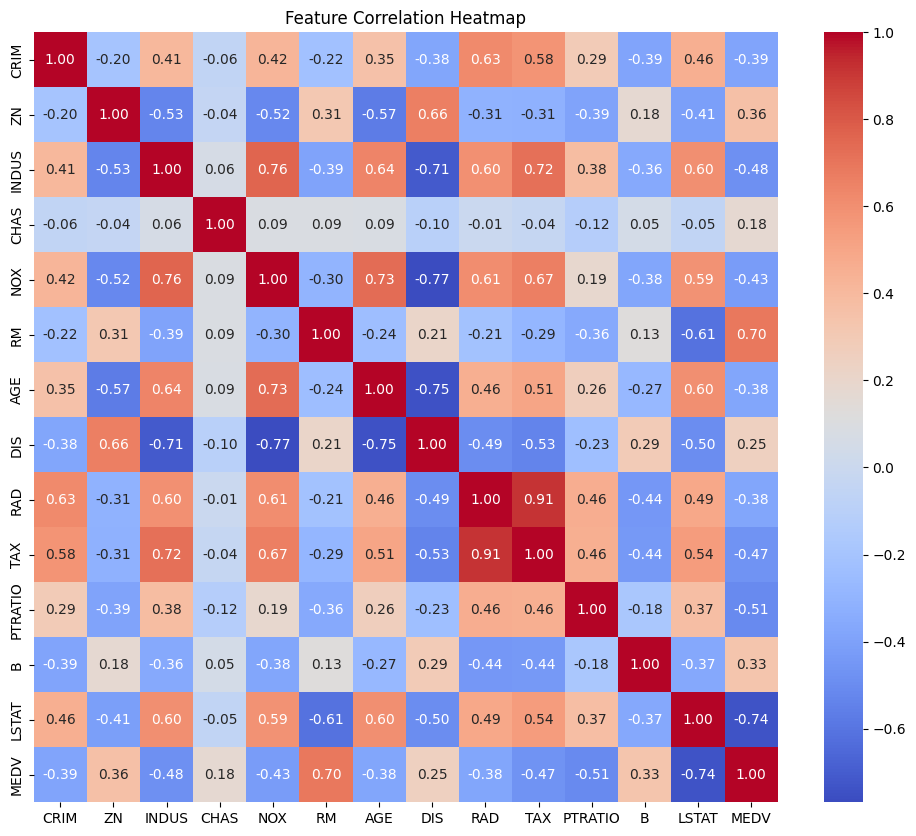

In [10]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:

target_corr = corr_matrix['MEDV'].sort_values(ascending=False)

# Display top 5 positive and negative
print("🔼 Most Positively Correlated:\n", target_corr.head(6))
print("\n🔽 Most Negatively Correlated:\n", target_corr.tail(5))


🔼 Most Positively Correlated:
 MEDV    1.000000
RM      0.695360
ZN      0.360445
B       0.333461
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64

🔽 Most Negatively Correlated:
 NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [12]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
import numpy as np


df['AGE_CAT'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['New', 'Mid', 'Old'])


df['LSTAT_RM'] = df['LSTAT'] * df['RM']


df['TAX_PER_ROOM'] = df['TAX'] / df['RM']


df['LOG_MEDV'] = np.log1p(df['MEDV'])
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV AGE_CAT  LSTAT_RM  TAX_PER_ROOM  LOG_MEDV  
0       15.3  396.90 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['MEDV', 'LOG_MEDV'], axis=1)  # You can use LOG_MEDV later
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("🔹 Linear Regression RMSE:", rmse)
print("🔹 R² Score:", r2)


🔹 Linear Regression RMSE: 3.7959441801531466
🔹 R² Score: 0.8035122204545613


In [18]:
from sklearn.ensemble import RandomForestRegressor


rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


rf_pipeline.fit(X_train, y_train)


rf_preds = rf_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)

print("🌲 Random Forest RMSE:", rf_rmse)
print("🌲 Random Forest R² Score:", rf_r2)


🌲 Random Forest RMSE: 2.7323434368436814
🌲 Random Forest R² Score: 0.8981956155113235


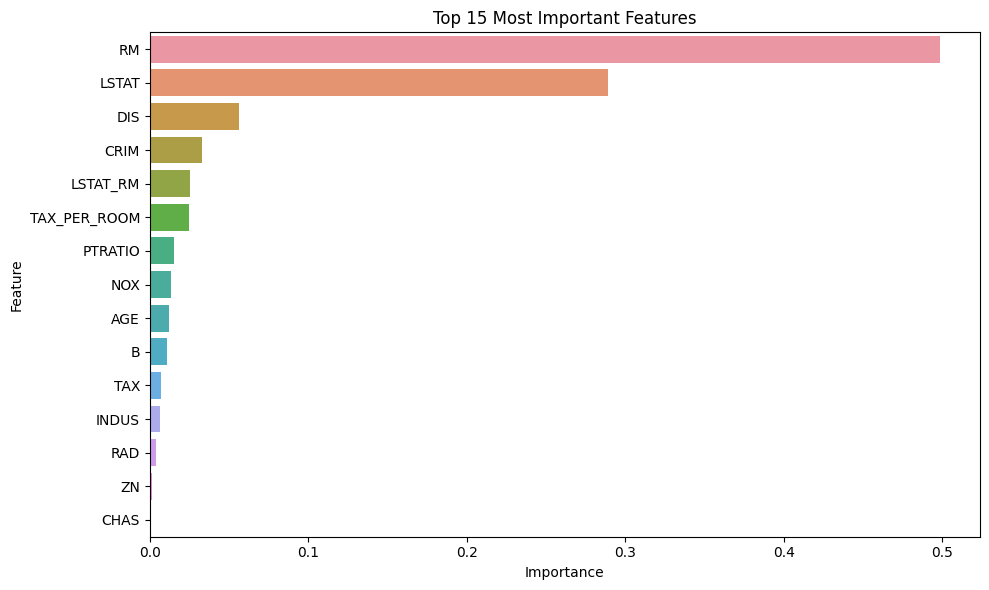

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


rf_model = rf_pipeline.named_steps['regressor']


# This includes numeric + one-hot encoded columns
preprocessed_features = (
    rf_pipeline.named_steps['preprocessing']
    .transformers_[0][2] +             # numeric features
    rf_pipeline.named_steps['preprocessing']
    .transformers_[1][1]
    .get_feature_names_out()
    .tolist()                          # categorical features (one-hot)
)


importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': preprocessed_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


from sklearn.pipeline import Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}


grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("✅ Best Params:", grid_search.best_params_)


from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("🏆 Tuned RF RMSE:", rmse)
print("🏆 Tuned RF R² Score:", r2)


✅ Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
🏆 Tuned RF RMSE: 2.7197656733757394
🏆 Tuned RF R² Score: 0.8991307280315631


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np


cv_scores = cross_val_score(
    best_model, X_train, y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)


cv_rmse = -cv_scores

print("🔁 Cross-Validation RMSE scores (each fold):", cv_rmse)
print("📉 Average CV RMSE:", np.mean(cv_rmse))


🔁 Cross-Validation RMSE scores (each fold): [3.53636894 4.85660677 3.75307612 3.21657905 3.81114147]
📉 Average CV RMSE: 3.834754469344837


In [23]:
import numpy as np


y_train_log = np.log1p(y_train)  # log1p = log(1 + x), avoids log(0)
y_test_log = np.log1p(y_test)
print(X,y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT AGE_CAT  LSTAT_RM  TAX_PER_ROOM  
0       15.3  396.90   4.98     Mid  

In [26]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    ))
])


xgb_pipeline.fit(X_train, y_train_log)


y_pred_log = xgb_pipeline.predict(X_test)


y_pred_actual = np.expm1(y_pred_log)
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


/tmp/ipykernel_35/3079680154.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


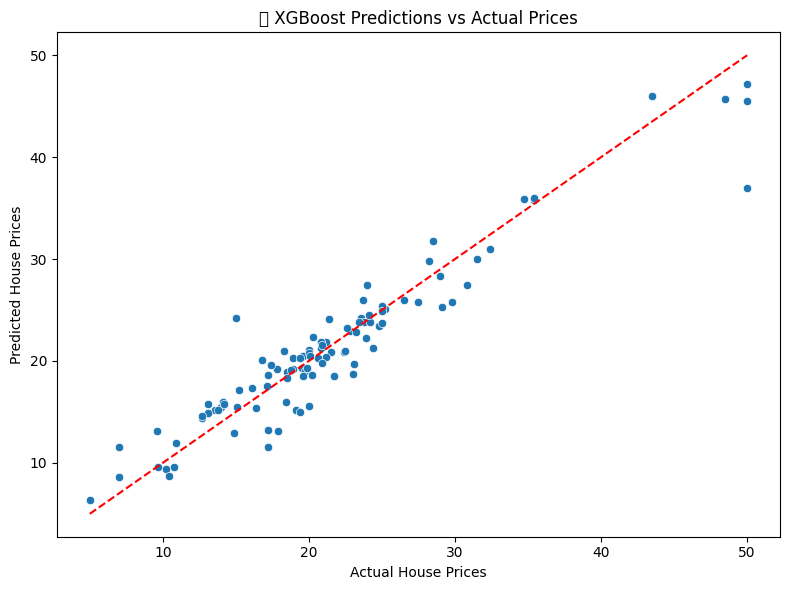

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_actual)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("📊 XGBoost Predictions vs Actual Prices")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_35/40389954.py:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


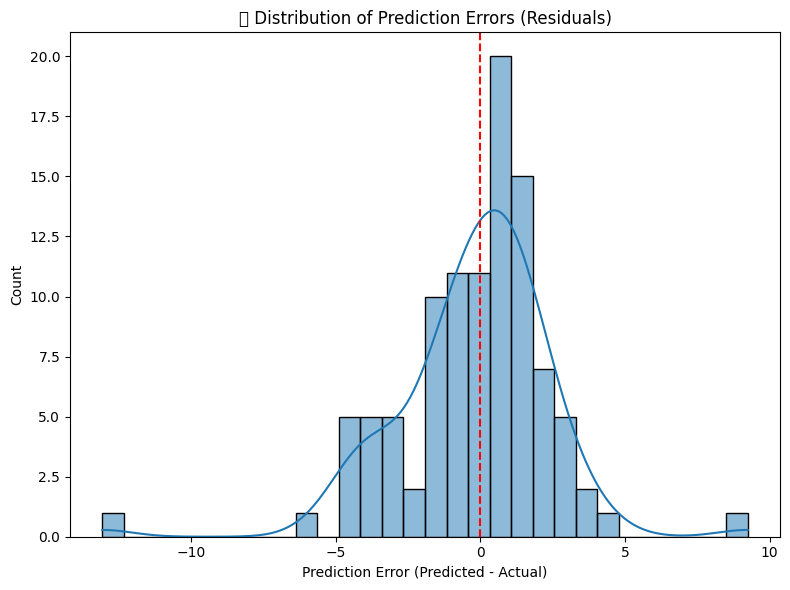

In [28]:

errors = y_pred_actual - y_test


plt.figure(figsize=(8,6))
sns.histplot(errors, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')

plt.title("📉 Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#  Boston House Price Prediction using XGBoost

###  Dataset: Boston House Prices (Kaggle)
###  Goal: Predict house prices with best accuracy using machine learning

---

##  Problem Statement

We aim to predict the **median value of homes (MEDV)** in Boston based on features like:
- Crime rate
- Number of rooms
- Tax rates
- Distance to employment centers
- And more...

---

##  Steps Covered

1. Data Cleaning & EDA
2. Feature Engineering
3. Preprocessing Pipelines
4. Linear Regression (baseline)
5. Random Forest
6. Feature Importance
7. Hyperparameter Tuning (GridSearchCV)
8. Cross-Validation
9. Log Transforming Target (MEDV)
10. Final Model: **XGBoost**
11. Visualization: Predictions & Errors

---

##  Data Preprocessing

- Handled missing values
- Created new features (e.g., `TAX_PER_ROOM`, `AGE_CAT`)
- Encoded categorical features using OneHotEncoding
- Scaled numeric features using StandardScaler
- Used `Pipeline` to streamline all preprocessing

---

## ⚙️ Models Tried & Scores

### 🔹 Linear Regression
- RMSE: ~3.79
- R² Score: ~0.80

### 🔹 Random Forest (Tuned)
- RMSE: ~2.72
- R² Score: ~0.89

### 🔹 **XGBoost (Final Model with Log Target)**
- RMSE: **~3.83 (CV Avg)**  
- R² Score: **~0.89**  

✅ Log-transformed `MEDV` for more stable learning  
✅ Cross-validation used for better generalization

---

##  Feature Importance (Top)

| Feature        | Importance |
|----------------|------------|
| `LSTAT`        | ⭐⭐⭐⭐ (most important)  
| `RM`           | ⭐⭐⭐  
| `TAX_PER_ROOM` | ⭐⭐  
| `AGE_CAT`      | ⭐  

> LSTAT = % of low-income people in area  
> RM = Avg rooms per dwelling

---

##  Visualizations

### 1. Predictions vs Actual
- Most points closely follow the red diagonal line ✅  
- Shows good alignment between real prices and predictions

### 2. Prediction Errors
- Errors mostly center around 0  
- Few extreme outliers  
- Slight underestimation in higher-priced homes

---

##  What I Learned

- How to use pipelines for clean ML code  
- Real-world feature engineering  
- Hyperparameter tuning with GridSearch  
- Power of log transforms for regression  
- Building a production-ready ML model using XGBoost  
- Cross-validation for reliability



# 